In [6]:
#importing the required library
import pandas as mypanda
import numpy as np
from scipy import stats as mystats
import matplotlib.pyplot as myplot
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

In [7]:
#importing the dataset
myData=mypanda.read_csv('Salary_Data.csv')
myData

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


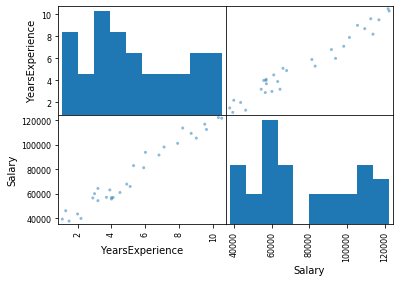

In [8]:
Exp=myData.YearsExperience
Sal=myData.Salary
scatter_matrix(myData)
myplot.show()

In [9]:
np.corrcoef(Exp,Sal)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [10]:
#using the ols method 
mymodel=sm.OLS(Exp,Sal)
mymodel=mymodel.fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                    2.56e-24
Time:                        18:47:04   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary      7.341e-05   2.27e-06     32.376      0.000    6.88e-05    7.81e-05
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.709
Skew:                           0.152   Prob(JB):                        0.701
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x=myData.iloc[:,:-1].values
print(x)
y=myData.iloc[:,1].values
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [15]:
#dividing the data based on testing and training dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [16]:
#importing the linear regression 
from sklearn.linear_model import LinearRegression
CreateModel=LinearRegression()

In [17]:
#fitting the model
CreateModel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predict=CreateModel.predict(x_test)
y_predict

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [23]:
#accuracy
model_accuracy=CreateModel.score(x,y)
model_accuracy

0.9565349708076957

In [24]:
#finding the error
error_in_model=1-model_accuracy
error_in_model

0.04346502919230433